In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.3.9
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.9 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'


/content
100% 49.7M/49.7M [00:00<00:00, 423MB/s]
Ultralytics 8.3.9 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

100% 104k/104k [00:00<00:00, 68.6MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 57.6ms
Speed: 14.5ms preprocess, 57.6ms inference, 372.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
model = YOLO(f'{HOME}/yolov8m.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 56.7ms
Speed: 1.9ms preprocess, 56.7ms inference, 148.9ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[  68.5242,  249.5817,  644.2305,  929.1172],
        [   0.0000,  354.1623,  637.2099, 1275.3462],
        [ 627.4268,  733.7242,  695.9683,  787.4945],
        [   0.0000,  675.5505,  439.9560, 1279.5044]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7889, 0.7302, 0.7294, 0.4113], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([16.,  0.,  2., 24.], device='cuda:0')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Final.v1i.yolov8


/content/drive/MyDrive/Final.v1i.yolov8


In [ ]:
 !ls

data.yaml	    README.roboflow.txt  test	valid  yolo11n.pt  yolov8s.pt
README.dataset.txt  runs		 train	wandb  yolov8m.pt


In [ ]:
hyp = {
    "lr0": 0.01,        # Initial learning rate
    "momentum": 0.937,  # SGD momentum
    "weight_decay": 0.0005,  # Weight decay for regularization
    "batch_size": 16,   # Number of images per batch
    "imgsz": 640,       # Input image size
    "iou": 0.2,         # IoU threshold for NMS
    "conf": 0.001,      # Confidence threshold for NMS
    "fliplr": 0.5,      # Probability of horizontal flip augmentation
    "scale": 0.5        # Scale augmentation factor
}

In [ ]:
%cd /content/drive/MyDrive/Final.v1i.yolov8

!yolo task=detect mode=train model=yolov8m.pt data= data.yaml epochs=150 imgsz=640 batch = 16 device = 0 plots=True


/content/drive/MyDrive/Final.v1i.yolov8
New https://pypi.org/project/ultralytics/8.3.134 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.9 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, s

In [ ]:
!ls runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2560.jpg
confusion_matrix.png				    train_batch2561.jpg
events.out.tfevents.1742835346.832c528e9f26.1866.0  train_batch2562.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


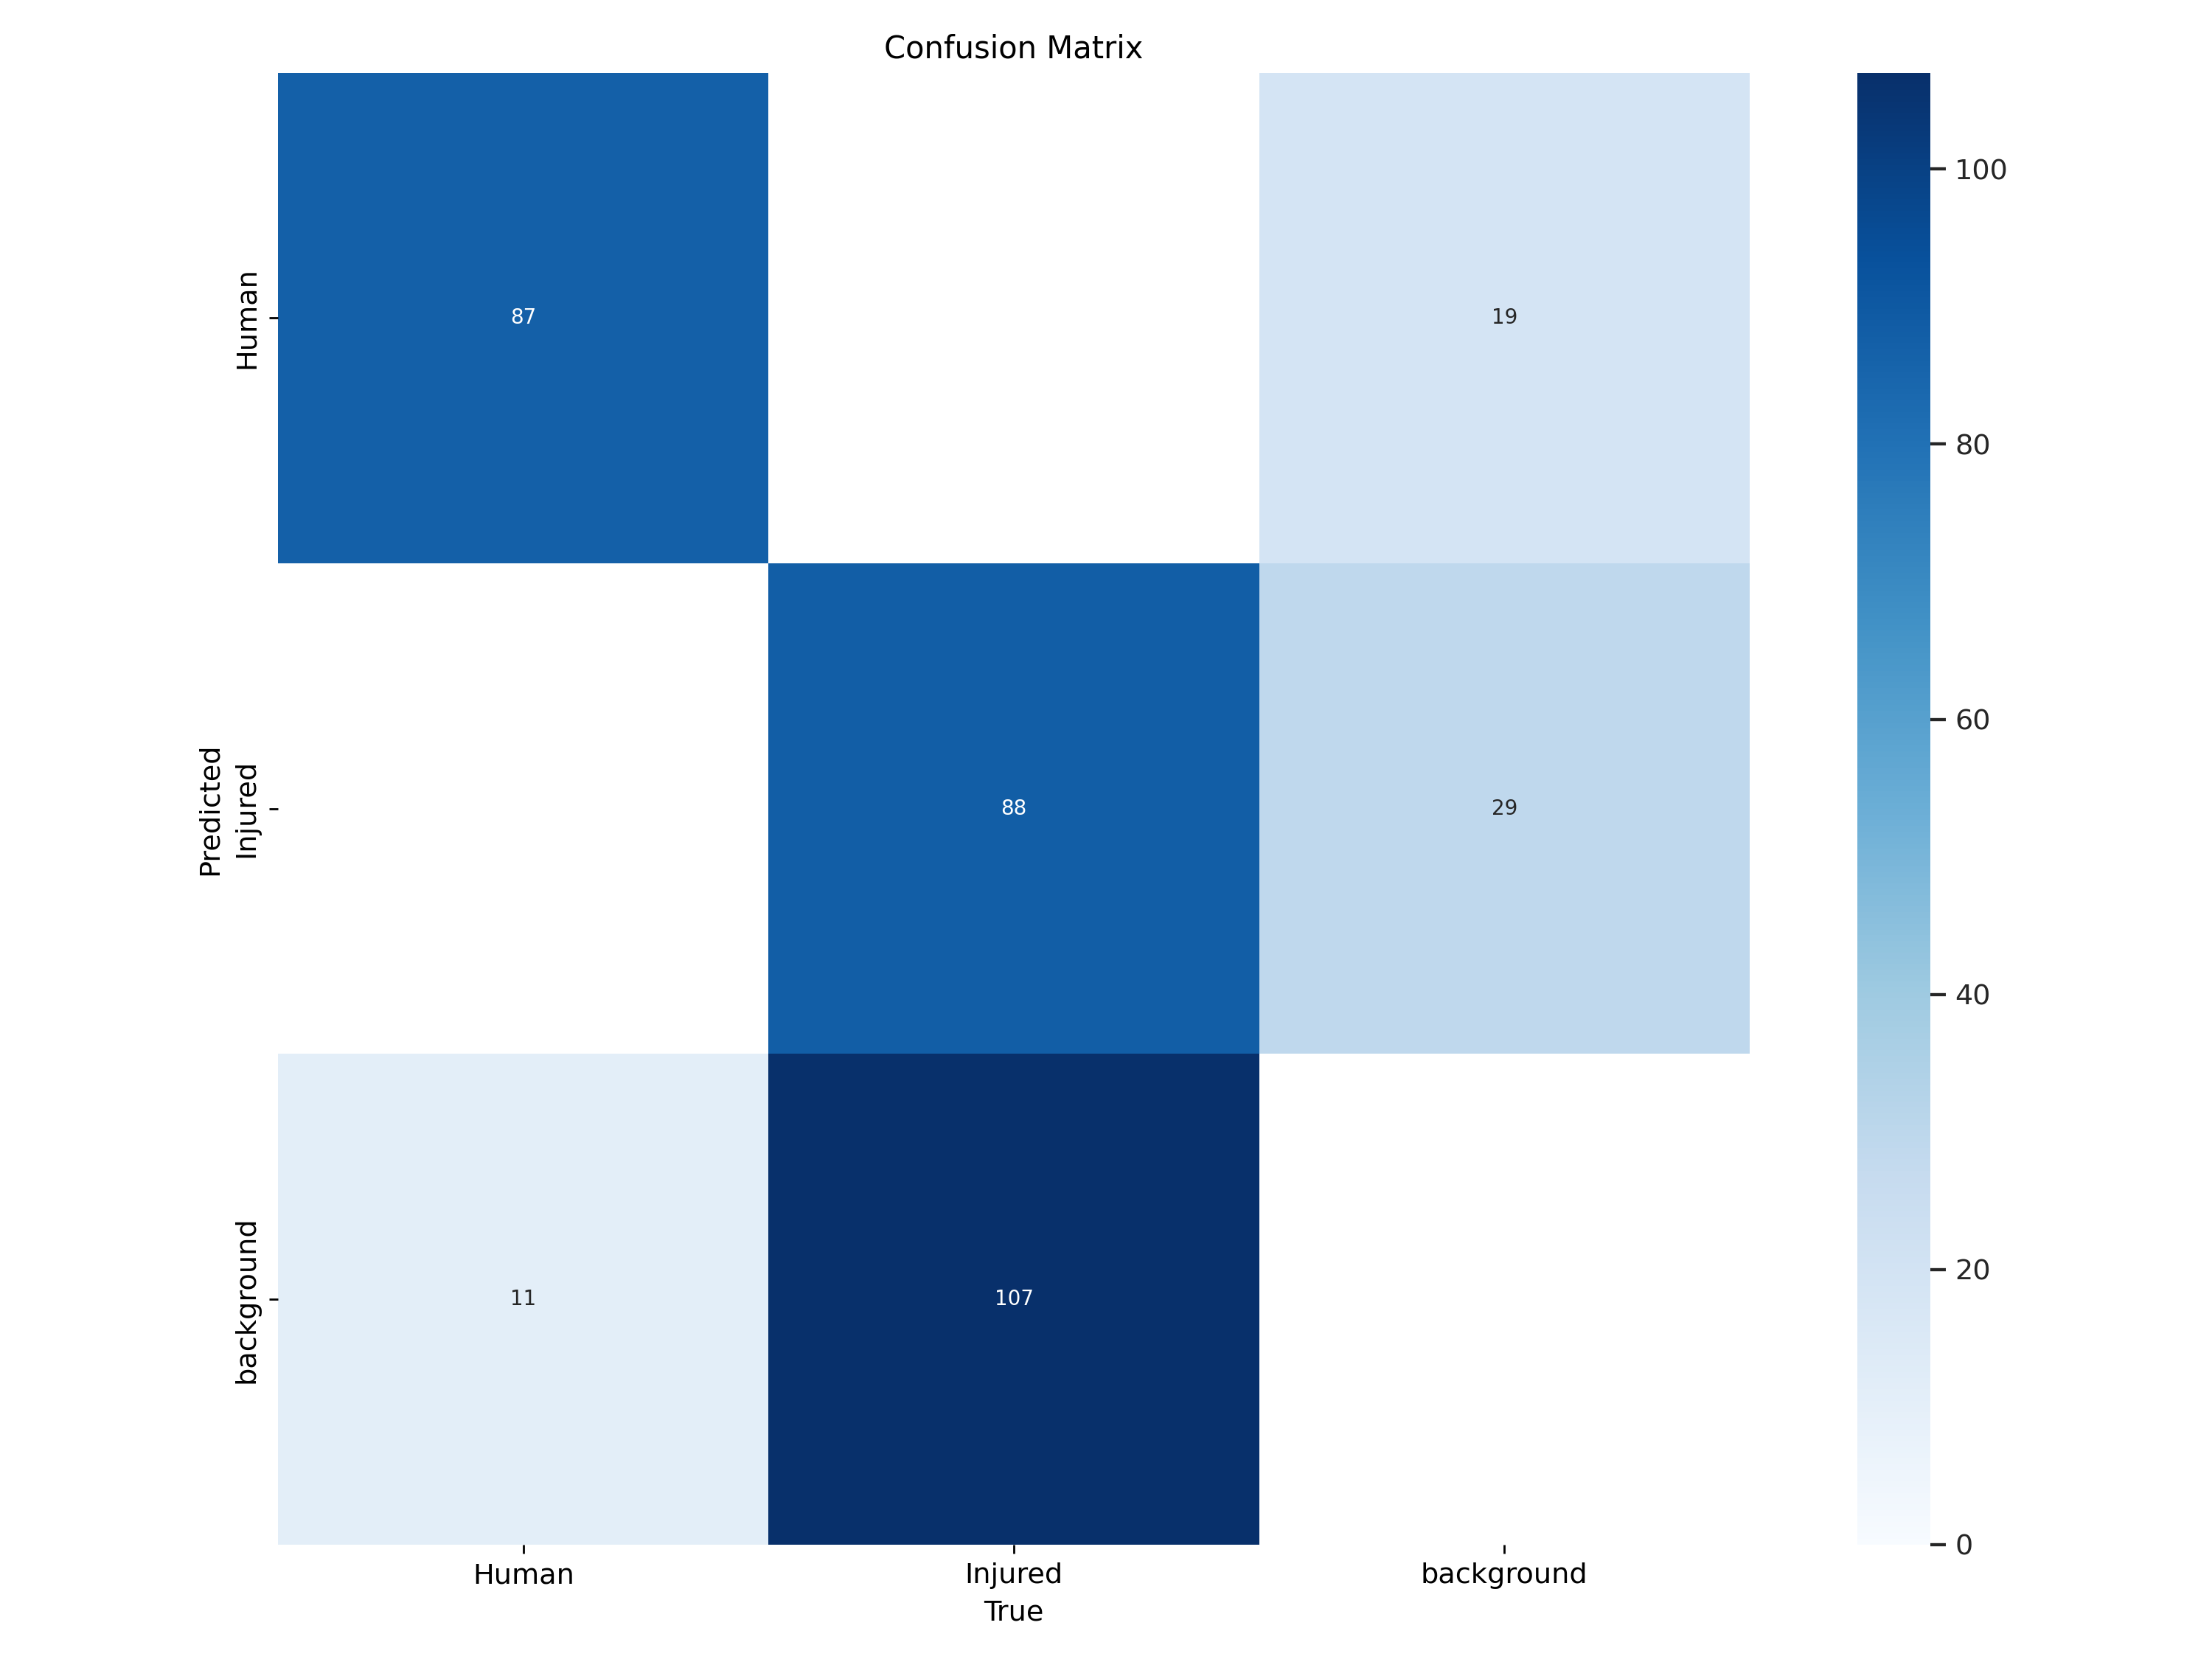

In [ ]:
Image(filename='/content/drive/MyDrive/Final.v1i.yolov8/runs/detect/train/confusion_matrix.png', width=600)

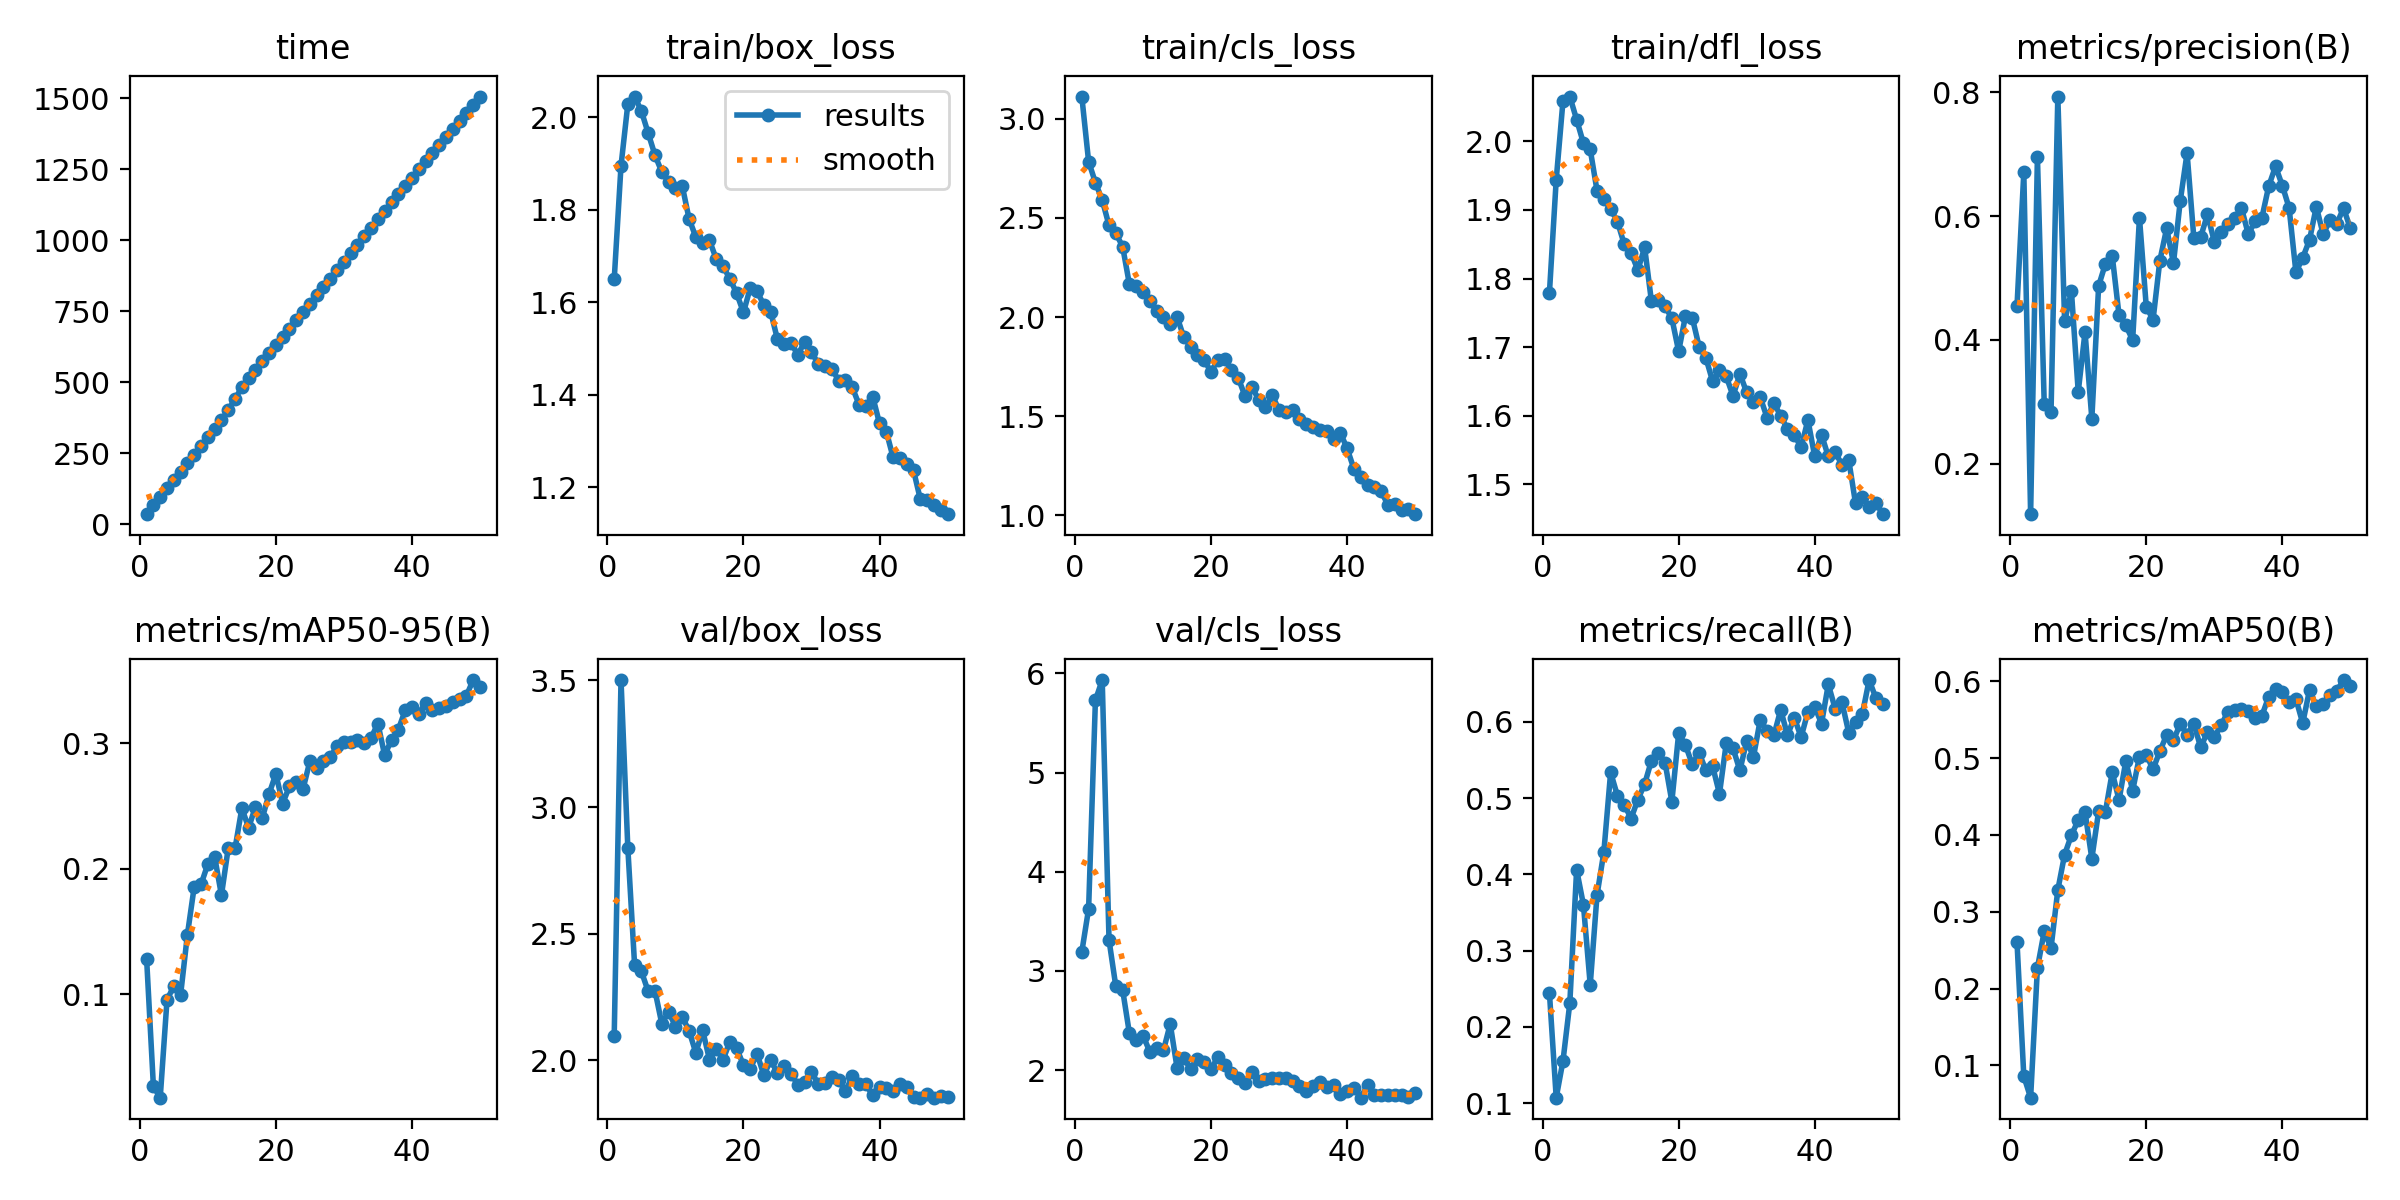

In [ ]:
Image(filename='/content/drive/MyDrive/Final.v1i.yolov8/runs/detect/train/results.png', width=600)

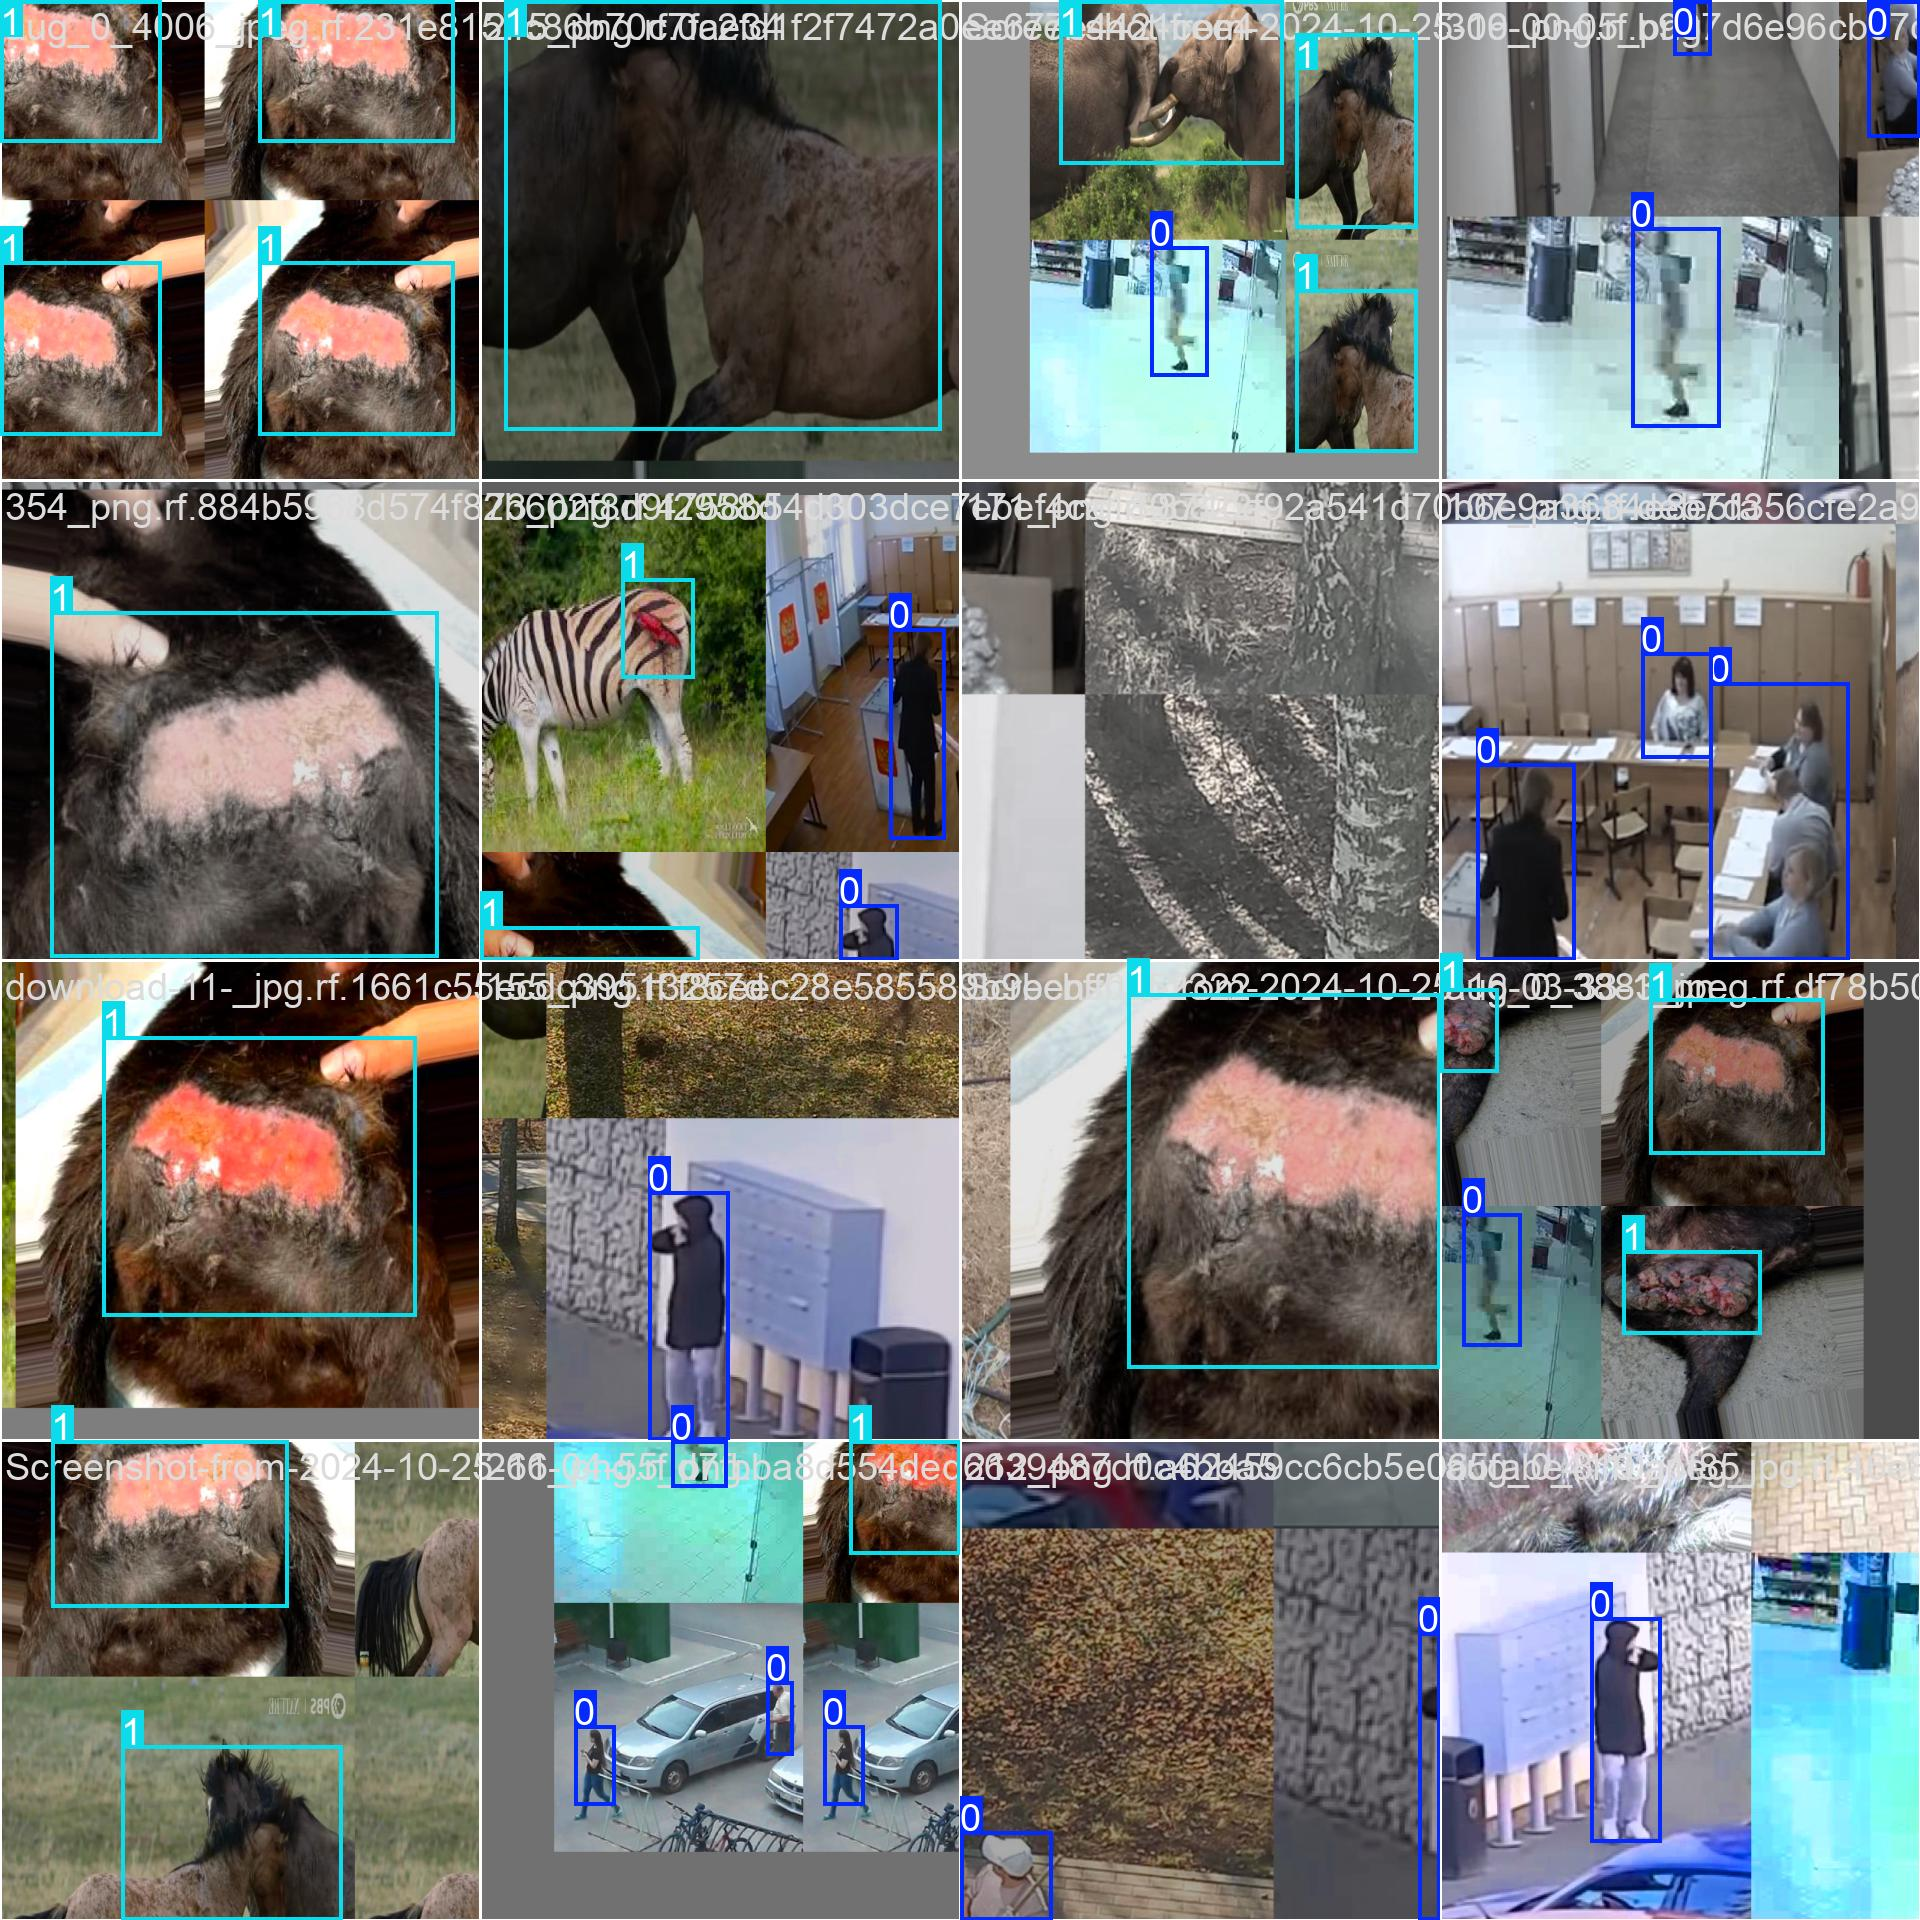

In [ ]:
Image(filename='/content/drive/MyDrive/Final.v1i.yolov8/runs/detect/train/train_batch0.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.9 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs
val: Scanning /content/drive/MyDrive/Final.v1i.yolov8/valid/labels.cache... 250 images, 21 backgrounds, 0 corrupt: 100% 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:04<00:00,  3.52it/s]
                   all        260        293      0.608      0.631      0.601      0.352
                 Human         74         98      0.719      0.888      0.799      0.543
               Injured        165        195      0.497      0.374      0.403      0.161
Speed: 1.5ms preprocess, 9.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val7
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/Final.v1i.yolov8"))

['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid', 'yolov8s.pt', 'runs', 'data.yaml', 'wandb', 'yolo11n.pt', 'yolov8m.pt']


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.35 source="/content/drive/MyDrive/Final.v1i.yolov8/test/images" save=True


Ultralytics 8.3.9 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs

image 1/204 /content/drive/MyDrive/Final.v1i.yolov8/test/images/-_jpg.rf.36df29c7eba0089249f5064cb5e3d7c5.jpg: 640x640 1 Injured, 15.2ms
image 2/204 /content/drive/MyDrive/Final.v1i.yolov8/test/images/-_jpg.rf.3f0764f9c0c83ffbaa4ad27674372b6e.jpg: 640x640 2 Injureds, 20.0ms
image 3/204 /content/drive/MyDrive/Final.v1i.yolov8/test/images/-_jpg.rf.5a93fbf1f7790eeb283ad4531782d0bd.jpg: 640x640 1 Injured, 35.2ms
image 4/204 /content/drive/MyDrive/Final.v1i.yolov8/test/images/142628494_206049124559213_9077132045337475909_o_jpg.rf.85713f167203e454468301e444399c24.jpg: 640x640 1 Injured, 15.2ms
image 5/204 /content/drive/MyDrive/Final.v1i.yolov8/test/images/337_png.rf.4741186a66c18de74a50a3272001e7f6.jpg: 640x640 1 Human, 15.4ms
image 6/204 /content/drive/MyDrive/Final.v1i.yolov8/test/images/347_png.rf.3d8e9356890eced94a18820a91925


image 1/1 /content/h1.jpeg: 448x640 2 Humans, 42.3ms
Speed: 2.7ms preprocess, 42.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict64


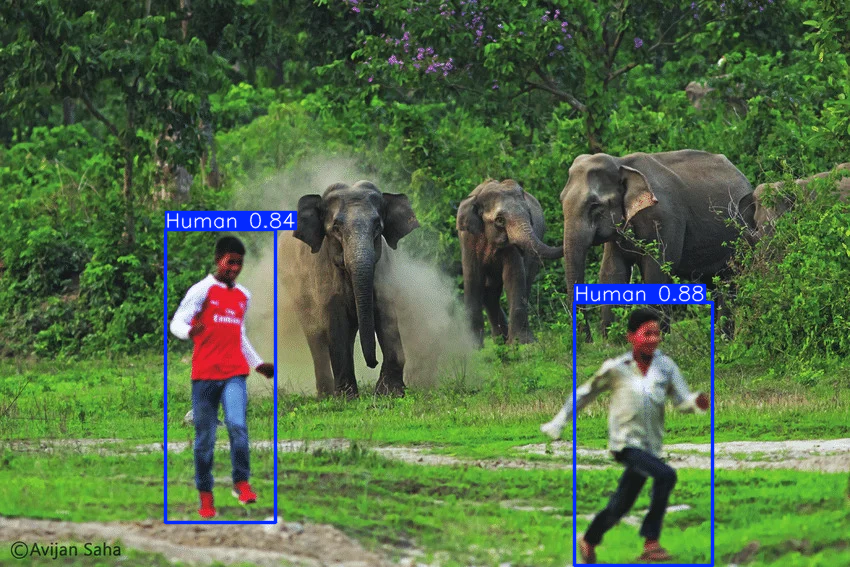

In [ ]:
model = YOLO('/content/drive/MyDrive/Final.v1i.yolov8/runs/detect/train/weights/best.pt')
results = model("/content/h1.jpeg", save=True)
results[0].show()

In [ ]:
model.save('YOLOv8.keras')